In [1]:
import numpy as np

import config
import getdata as gd
from modeling_main import get_one_model, get_multiple_models
import vizualization as viz

import warnings
warnings.filterwarnings('ignore')

## Get one classifier model and it's train/test metrices

In [2]:
clf, model_metrics = get_one_model('EGRX')

In [3]:
clf

SequentiallyBootstrappedBaggingClassifier(estimator=SVC(C=8000,
                                                        class_weight='balanced',
                                                        gamma=1e-05,
                                                        kernel='linear',
                                                        random_state=42),
                                          n_jobs=-1,
                                          price_bars=time
2016-05-24 00:00:00-04:00    49.39
2016-06-03 00:00:00-04:00    43.78
2016-06-10 00:00:00-04:00    53.00
2016-06-15 00:00:00-04:00    46.70
2016-06-20 00:00:00-04:00    40.76
                             ...  
2020-09-01 00:00:00-04:00    38.12
2020-09-18 00:00:...
2016-06-15 00:00:00-04:00   2016-06-20 00:00:00-04:00
2016-06-20 00:00:00-04:00   2016-06-27 00:00:00-04:00
                                       ...           
2020-09-01 00:00:00-04:00   2020-09-29 00:00:00-04:00
2020-09-18 00:00:00-04:00   2020-10-08 00:00:00-04:00
2020-10-08 00:00:00-04:00   2020-10-29 00:00:00-04:00
2021-01-06 00:00:00-05:00   2021-02-02 00:00:00-05:00
2021-02-16 00:00:00-05:00   2021-03-10 00:00:00-05:00
Name: t1, Length: 100, dtype: datetime64[ns, America/New_York])

In [4]:
model_metrics.drop(['best_model'], axis=1)

,type,best_cross_val_score,recall,precision,accuracy,run_time,train_test,symbol,cum_rtn,annualized_rtn,sharpe_ratio,performed_on,event_st_date,event_en_date,rawdata_st_date,rawdata_en_date,SPY_st_date,SPY_en_date,method
0,sequential_bootstrapping_SVC,0.002250,0.001857,0.002856,0.611209,1.229986,Train,EGRX,0.000000,0.000000,0.00,2023-04-12 18:25:06.387666,2016-05-24 00:00:00-04:00,2021-02-16 00:00:00-05:00,2015-12-01 00:00:00-05:00,2023-04-11 00:00:00-04:00,2015-12-01 00:00:00-05:00,2023-04-11 00:00:00-04:00,trend_labeling
1,sequential_bootstrapping_SVC,0.673489,0.932130,0.527204,0.821961,0.010043,Test,EGRX,1.022336,0.455368,1.12,2023-04-12 18:25:06.422191,2021-03-31 00:00:00-04:00,2023-02-14 00:00:00-05:00,2015-12-01 00:00:00-05:00,2023-04-11 00:00:00-04:00,2015-12-01 00:00:00-05:00,2023-04-11 00:00:00-04:00,trend_labeling


## Generate list if tickers, then get their trained classifiers and train/test metrices

In [5]:
pgConnStr = gd.pgDictToConn(config.pgSecrets)

lowest_price = 30
highest_price = 40

tickerlst = gd.getFilteredTickerList_Daily(lowest_price=lowest_price, highest_price=highest_price)
print('There are {} tickers between ${} and ${}'.format(len(tickerlst), lowest_price, highest_price))

There are 22 tickers between $30 and $40


In [6]:
clfs, model_metrics_df = get_multiple_models(tickerlst)

Processing 1/22 AQNU...
Small sample size - Unable to train model for AQNU
Modeling completed 1/22 AQNU
Processing 2/22 ATEX...
Modeling completed 2/22 ATEX
Processing 3/22 AVID...
Modeling completed 3/22 AVID
Processing 4/22 AVNS...
Modeling completed 4/22 AVNS
Processing 5/22 BROS...
Small sample size - Unable to train model for BROS
Modeling completed 5/22 BROS
Processing 6/22 CIR...
Modeling completed 6/22 CIR
Processing 7/22 CPSI...
Modeling completed 7/22 CPSI
Processing 8/22 CRTO...
Modeling completed 8/22 CRTO
Processing 9/22 CTR...
Modeling completed 9/22 CTR
Processing 10/22 EGRX...
Modeling completed 10/22 EGRX
Processing 11/22 FDP...
Modeling completed 11/22 FDP
Processing 12/22 FSBW...
Modeling completed 12/22 FSBW
Processing 13/22 GLP...
Modeling completed 13/22 GLP
Processing 14/22 GPRE...
Modeling completed 14/22 GPRE
Processing 15/22 KYMR...
Modeling completed 15/22 KYMR
Processing 16/22 PARAP...
Modeling completed 16/22 PARAP
Processing 17/22 PRCT...
Small sample size

In [7]:
model_metrics_df.drop(['best_model'], axis=1)

,type,best_cross_val_score,recall,precision,accuracy,run_time,train_test,symbol,performed_on,event_st_date,event_en_date,rawdata_st_date,rawdata_en_date,SPY_st_date,SPY_en_date,method,cum_rtn,annualized_rtn,sharpe_ratio
0,NaN,NaN,NaN,NaN,NaN,NaN,No Train - small sample size,AQNU,2023-04-12 18:25:15.927774,NaT,NaT,2021-06-29 00:00:00-04:00,2023-04-11 00:00:00-04:00,2021-06-29 00:00:00-04:00,2023-04-11 00:00:00-04:00,trend_labeling,NaN,NaN,NaN
1,sequential_bootstrapping_SVC,0.227586,0.250576,0.240345,0.617367,0.245789,Train,ATEX,2023-04-12 18:25:32.269743,2018-05-25 00:00:00-04:00,2022-01-12 00:00:00-05:00,2015-12-01 00:00:00-05:00,2023-04-11 00:00:00-04:00,2015-12-01 00:00:00-05:00,2023-04-11 00:00:00-04:00,trend_labeling,0.000000,0.000000,0.00
2,sequential_bootstrapping_SVC,0.640238,0.590402,0.699264,0.852149,0.011363,Test,ATEX,2023-04-12 18:25:32.290320,2022-01-24 00:00:00-05:00,2023-02-21 00:00:00-05:00,2015-12-01 00:00:00-05:00,2023-04-11 00:00:00-04:00,2015-12-01 00:00:00-05:00,2023-04-11 00:00:00-04:00,trend_labeling,0.048369,0.044847,0.04
3,sequential_bootstrapping_SVC,0.238648,0.182384,0.355956,0.625657,0.384006,Train,AVID,2023-04-12 18:25:43.532930,2017-08-04 00:00:00-04:00,2022-03-23 00:00:00-04:00,2015-12-01 00:00:00-05:00,2023-03-27 00:00:00-04:00,2015-12-01 00:00:00-05:00,2023-03-27 00:00:00-04:00,trend_labeling,0.000000,0.000000,0.00
4,sequential_bootstrapping_SVC,0.000000,0.000000,0.000000,0.486231,0.015662,Test,AVID,2023-04-12 18:25:43.568180,2022-04-26 00:00:00-04:00,2023-02-09 00:00:00-05:00,2015-12-01 00:00:00-05:00,2023-03-27 00:00:00-04:00,2015-12-01 00:00:00-05:00,2023-03-27 00:00:00-04:00,trend_labeling,-0.293000,-0.354613,-2.02
5,sequential_bootstrapping_SVC,0.203281,0.237360,0.212634,0.545033,10.162251,Train,AVNS,2023-04-12 18:26:34.756010,2016-10-27 00:00:00-04:00,2021-09-10 00:00:00-04:00,2015-12-01 00:00:00-05:00,2023-04-11 00:00:00-04:00,2015-12-01 00:00:00-05:00,2023-04-11 00:00:00-04:00,trend_labeling,0.000000,0.000000,0.00
6,sequential_bootstrapping_SVC,0.614982,0.966256,0.451018,0.709749,0.011439,Test,AVNS,2023-04-12 18:26:34.789220,2021-11-03 00:00:00-04:00,2023-02-27 00:00:00-05:00,2015-12-01 00:00:00-05:00,2023-04-11 00:00:00-04:00,2015-12-01 00:00:00-05:00,2023-04-11 00:00:00-04:00,trend_labeling,0.265212,0.195433,0.40
7,NaN,NaN,NaN,NaN,NaN,NaN,No Train - small sample size,BROS,2023-04-12 18:26:42.135006,NaT,NaT,2021-09-15 00:00:00-04:00,2023-04-11 00:00:00-04:00,2021-09-15 00:00:00-04:00,2023-04-11 00:00:00-04:00,trend_labeling,NaN,NaN,NaN
8,sequential_bootstrapping_SVC,0.000000,0.000000,0.000000,0.639156,1.346795,Train,CIR,2023-04-12 18:27:05.711985,2016-09-16 00:00:00-04:00,2021-09-17 00:00:00-04:00,2015-12-01 00:00:00-05:00,2023-03-27 00:00:00-04:00,2015-12-01 00:00:00-05:00,2023-03-27 00:00:00-04:00,trend_labeling,0.000000,0.000000,0.00
9,sequential_bootstrapping_SVC,0.000000,0.000000,0.000000,0.466997,0.013000,Test,CIR,2023-04-12 18:27:05.743709,2021-10-29 00:00:00-04:00,2023-02-28 00:00:00-05:00,2015-12-01 00:00:00-05:00,2023-03-27 00:00:00-04:00,2015-12-01 00:00:00-05:00,2023-03-27 00:00:00-04:00,trend_labeling,-0.503338,-0.408164,-1.24


In [8]:
# save artifacts - model metrics df
import datetime
import os

folder_name = 'artifacts'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
file_path = os.path.join(folder_name, 'model_metrics_demo_{}.csv'.format(datetime.datetime.now().strftime("%Y%m%d%H%M%S")))

model_metrics_df.to_csv(file_path, index=False)


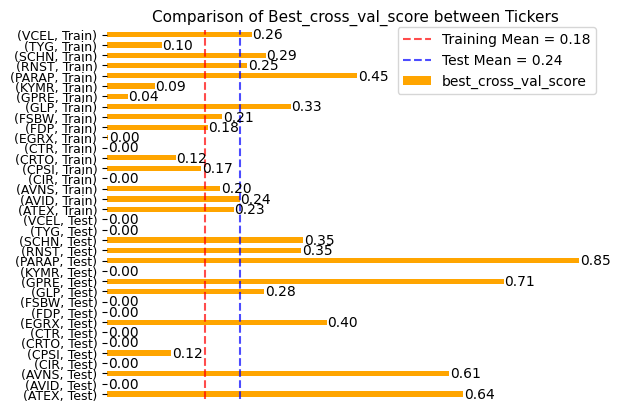

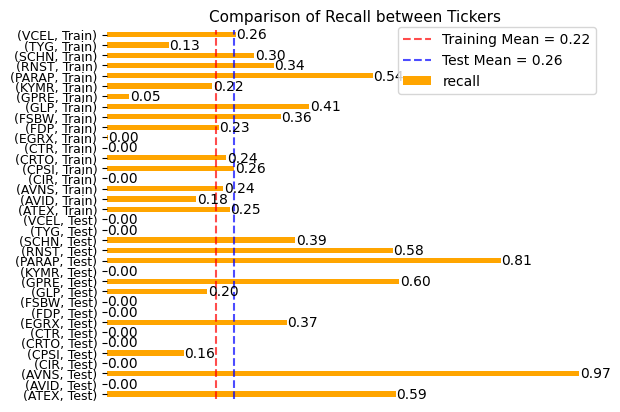

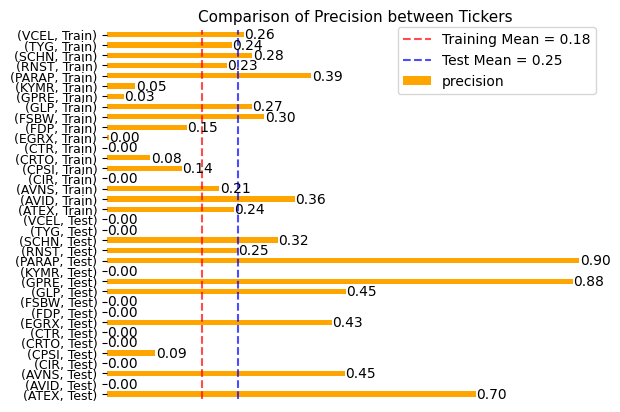

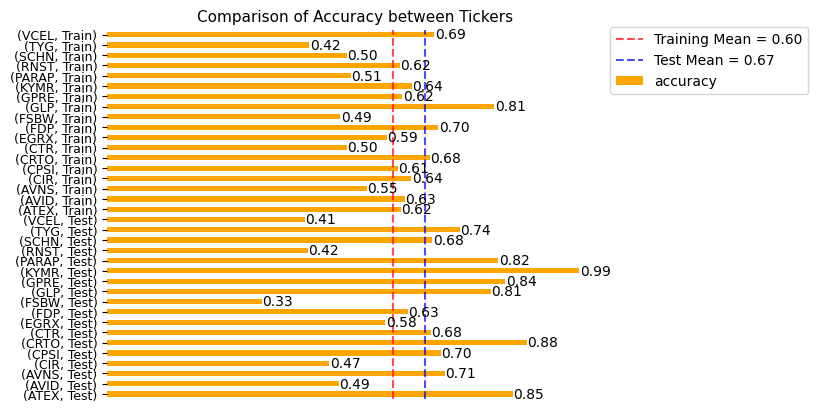

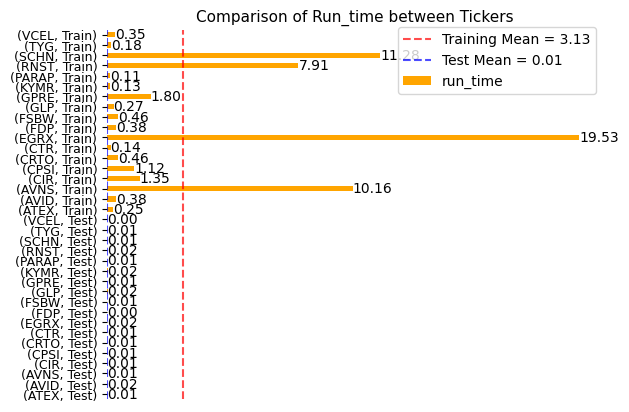

In [11]:
# check the results
import matplotlib.pyplot as plt
%matplotlib inline

model_metrics_tbl_temp = model_metrics_df[['symbol','train_test','best_cross_val_score','recall','precision','accuracy','run_time']].dropna().set_index(['symbol', 'train_test']).sort_index(level=1)

viz.plot_model_metrics(model_metrics_tbl_temp, add_msg='between Tickers', show_train_test_mean=True)

